# **Machine Learning Question 1**

The objective of the first question is to use the ensemble learning functionality to identify the extent to which classification performance can be improved through the combination of multiple models. Experiments will be run on a dataset extracted from US Census data. The data contains 14 attributes including age, race, sex, marital status etc, and the goal is to predict whether an individual earns over $50k per year based on these attributes. I used the dataset associated with my student number, census_17328666 to answer this question. 

**Import Modules Necessary**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from scipy import stats

## **(a) Dataset Exploration, Preparation and Cleaning**
- **Data Cleaning:** Begin by handling missing values, outliers, and errors in the dataset. This involves imputation, removal, or correction of data points.
- **Data Analysis:** Perform basic Data analysis to see distribution of variables in data and to develop understanding about the problem.
- **Feature Engineering:** Transform features to make them more informative for the models. This includes encoding categorical variables, and normalizing or scaling numerical features.
- **Feature Selection:** Eliminate redundant features to improve data quality with more than 50% inappropriate values.
- **Evaluation Measure Selection:** Evaluation metrics (e.g., accuracy, precision, recall, roc_curve for this classification task in particular as it is widely used).

**Load Data and Perform an Initial Exploration of the data**

In [2]:
# Load the dataset associated with my student number, 17328666
path = 'census_17328666.csv' 
data = pd.read_csv(path)

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,41,Private,175674,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
1,35,Private,343403,Some-college,10,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,59,Local-gov,236426,Assoc-acdm,12,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
3,36,Self-emp-not-inc,112497,Prof-school,15,Divorced,Prof-specialty,Unmarried,White,Male,25236,0,40,United-States,>50K
4,38,Private,252250,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,65,United-States,<=50K


In [4]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
9995,46,Private,256522,1st-4th,2,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,Puerto-Rico,<=50K
9996,27,Private,100168,7th-8th,4,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States,<=50K
9997,46,Self-emp-inc,110457,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,>50K
9998,39,Private,214896,HS-grad,9,Separated,Other-service,Not-in-family,White,Female,0,0,40,El-Salvador,<=50K
9999,51,Self-emp-not-inc,134447,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,70,United-States,<=50K


In [5]:
# Understanding data types
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
age                  int64
 workclass          object
 fnlwgt              int64
 education          object
 education-num       int64
 marital-status     object
 occupation         object
 relationship       object
 race               object
 sex                object
 capital-gain        int64
 capital-loss        int64
 hours-per-week      int64
 native-country     object
 Income-category    object
dtype: object


In [6]:
# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
age                 0
 workclass          0
 fnlwgt             0
 education          0
 education-num      0
 marital-status     0
 occupation         0
 relationship       0
 race               0
 sex                0
 capital-gain       0
 capital-loss       0
 hours-per-week     0
 native-country     0
 Income-category    0
dtype: int64


Check for unique values in dataframes categorical columns

In [7]:
def print_unique_values(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    # iterate over the categorical columns and print the unique values
    for column in categorical_columns:
        print(f"Unique values in '{column}': {df[column].unique()}")

In [8]:
print_unique_values(data)

Unique values in ' workclass': [' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' ?'
 ' Self-emp-inc' ' State-gov' ' Without-pay' ' Never-worked']
Unique values in ' education': [' Bachelors' ' Some-college' ' Assoc-acdm' ' Prof-school' ' 11th'
 ' HS-grad' ' Assoc-voc' ' 12th' ' Masters' ' 7th-8th' ' 10th' ' 5th-6th'
 ' 1st-4th' ' 9th' ' Doctorate' ' Preschool']
Unique values in ' marital-status': [' Married-civ-spouse' ' Never-married' ' Divorced' ' Separated'
 ' Widowed' ' Married-spouse-abs' ' Married-AF-spouse']
Unique values in ' occupation': [' Tech-support' ' Sales' ' Prof-specialty' ' Machine-op-inspct'
 ' Transport-moving' ' Other-service' ' Craft-repair' ' Adm-clerical' ' ?'
 ' Handlers-cleaners' ' Farming-fishing' ' Exec-managerial'
 ' Protective-serv' ' Priv-house-serv' ' Armed-Forces']
Unique values in ' relationship': [' Husband' ' Not-in-family' ' Unmarried' ' Own-child' ' Other-relative'
 ' Wife']
Unique values in ' race': [' White' ' Asian-Pac-Islander' ' Bl

There are ? values in various object variables, these need to be identified.

In [9]:
def count_question_marks(df):
    return df.applymap(lambda x: x == ' ?').sum()

count_question_marks(data)

age                   0
 workclass          535
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation         536
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     174
 Income-category      0
dtype: int64

There are columns that have ? values within them, this must be resolved before begining data analysis. 

In [10]:
def drop_question_mark_rows(df):
    # replace ' ?' with NaN to use dropna method
    df_cleaned = df.replace(' ?', pd.NA).dropna()
    return df_cleaned

data = drop_question_mark_rows(data)

Descriptive Statistics of the Data

In [11]:
data.describe()



,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,9298.000000,9.298000e+03,9298.000000,9298.000000,9298.000000,9298.000000
mean,38.616692,1.894827e+05,10.162508,1124.552700,93.921381,41.080125
std,12.959705,1.044600e+05,2.571709,7529.136017,414.327410,11.915154
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173742e+05,9.000000,0.000000,0.000000,40.000000
50%,37.500000,1.795740e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.365752e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.455435e+06,16.000000,99999.000000,3900.000000,99.000000


The average age of participants is approximately 38.61 years, with a standard deviation of 12.95, indicating a moderately wide age range. The 'fnlwgt' (final weight) column, possibly reflecting some form of sampling weight, has a mean of around 189,4827 with a significant standard deviation, suggesting considerable variability in this measure across the dataset.

Educational attainment, measured in years, averages about 10.16 years with a moderate spread. Financial attributes, 'capital-gain' and 'capital-loss', show low average values but with high maximums (especially capital gain), indicating that while most values are low, there are extreme cases. The average working hours per week is about 41, close to a typical full-time work schedule.

In [12]:
data.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Income-category
count,9298,9298,9298,9298,9298,9298,9298,9298,9298
unique,7,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,6899,3008,4354,1291,3863,7982,6292,8466,6934


The dataset encompasses 9 unique work classes, 16 educational categories, 7 marital statuses, 14 types of occupations, 5 relationship types, 5 racial groups, 2 genders, 40 native countries, and 2 income categories. Notably, the most common work class is 'Private', the most frequent educational attainment is 'HS-grad', and the most common marital status is 'Married-civ-spouse'. The top occupation is 'Prof-specialty', and the majority of the participants are identified as 'Husband' in the relationship category, 'White' in race, 'Male' in gender, hail from the 'United-States', and fall into the '≤50K' income category. These frequencies provide insights into the demographic and socio-economic composition of the dataset.

**Check for Outliers**

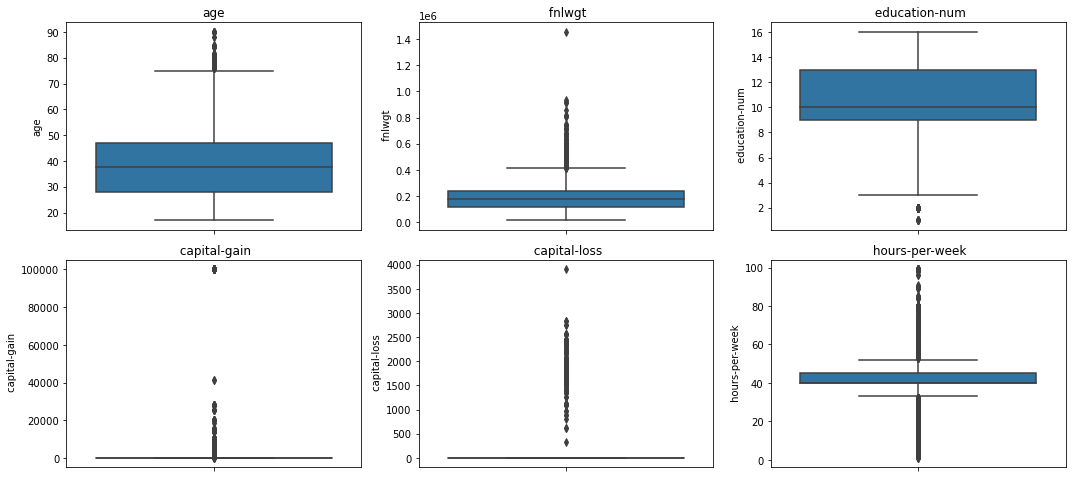

In [13]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
#  boxplots for each numerical feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [14]:

# Remove outliers based on Z-score (consider points with Z-score > 3 as outliers)
data = data[(np.abs(stats.zscore(data[numerical_columns])) < 3).all(axis=1)]


### **Basic Data Visualisation and Analytics**

**Income Distribution by Education Level and Gender: 

Next I will show the income distribution by education level and gender. I will do this using a grouped barchart thats shows the distribution of income categories ('>50K' and '<=50K') across different education levels, further broken down by gender. This will reveal how education and gender intersect with income.**

<Figure size 720x1440 with 0 Axes>

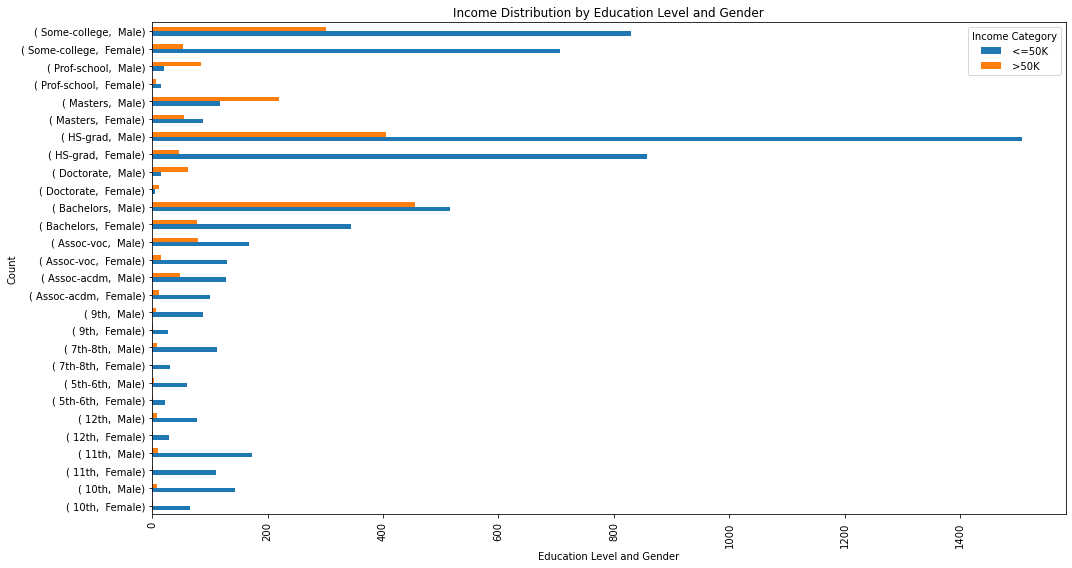

In [15]:

plot_data = data.groupby([' education', ' sex', ' Income-category']).size().reset_index(name='count')

# pivot table for the grouped bar chart
pivot_data = plot_data.pivot_table('count', [' education', ' sex'], ' Income-category')

# the grouped bar chart
plt.figure(figsize=(10, 20))
pivot_data.plot(kind='barh', stacked=False, color=['#1f77b4', '#ff7f0e'], figsize=(15, 8))

plt.xticks(rotation=90)
plt.xlabel('Education Level and Gender')
plt.ylabel('Count')
plt.title('Income Distribution by Education Level and Gender')
plt.legend(title='Income Category', loc='upper right')
plt.tight_layout()

plt.show()


**Insights**

- For every education level, there are more individuals earning ≤$50K than those earning more then $50K, regardless of gender.
- The greatest disparity between income levels is seen among individuals with 'Some-college' education, particularly in males.
- Males with a 'Bachelors' degree have the highest count of individuals earning more then $50K, in comparison females with the same levels of education do not earn as much. 
- Both males and females with a 'Masters' or 'Doctorate' degree also have a significant count in the >$50K income category, with males slightly leading.
- At the 'HS-grad' level, the number of individuals earning ≤$50K is substantially higher than those earning more, for both genders.

**Note: The chart shows that higher education generally correlates with higher income, but the gender gap is evident across all levels of education.**

**Age Distribution in Different Workclasses: A series of density plots or violin plots for each workclass category, showing the distribution of ages. This will help understand the age demographics in different types of work environments.**

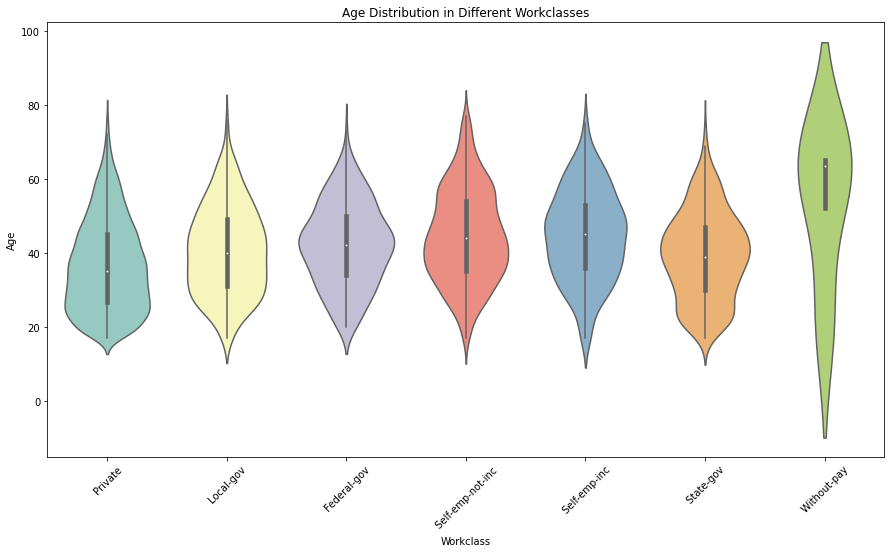

In [16]:
plt.figure(figsize=(15, 8))

# istribution of ages in different workclasses
sns.violinplot(x=' workclass', y='age', data=data, palette='Set3')

plt.xticks(rotation=45)
plt.xlabel('Workclass')
plt.ylabel('Age')
plt.title('Age Distribution in Different Workclasses')

plt.show()

**Insights**
- The widest age distributions are in the 'Private' and 'Self-emp-inc' work classes, suggesting a diverse range of ages in these sectors.
- 'Self-emp-not-inc' and 'Federal-gov' show narrower distributions, indicating a more concentrated age range of workers.
- The 'State-gov' and 'Local-gov' work classes have similar age distributions, with the bulk of their workforces being middle-aged.
- The 'Without-pay' work class has a very distinct, elongated distribution with few outliers, suggesting that people of all ages are represented, but with fewer individuals overall.

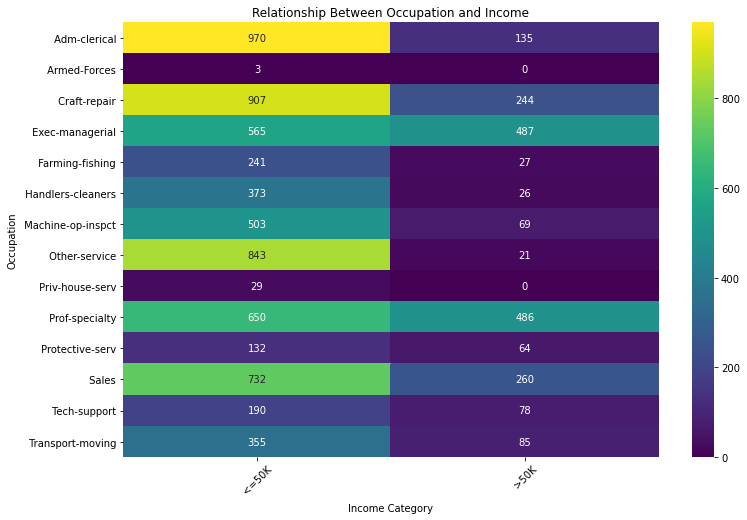

In [17]:
occupation_income_data = data.groupby([' occupation', ' Income-category']).size().reset_index(name='count')
occupation_income_pivot = occupation_income_data.pivot(' occupation', ' Income-category', 'count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(occupation_income_pivot, annot=True, fmt=".0f", cmap='viridis')

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel('Income Category')
plt.ylabel('Occupation')
plt.title('Relationship Between Occupation and Income')

plt.show()

The distribution in the heatmap above indicates that some occupations, like Executive-Managerial and Professional Specialty, are more likely to yield incomes above $50k, while others, such as Farming-Fishing and Private-House-Service, are predominantly associated with incomes at or below $50k.

Box plot to show the distribution of marital status and hour-per-week

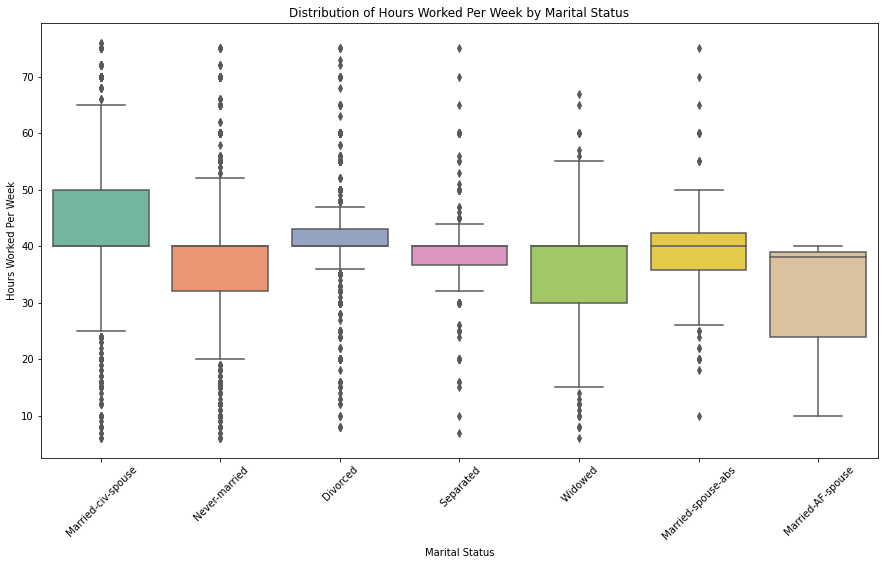

In [18]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=' marital-status', y=' hours-per-week', data=data, palette='Set2')

plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Hours Worked Per Week')
plt.title('Distribution of Hours Worked Per Week by Marital Status')

plt.show()

**Insghts**
- The median hours worked per week are fairly consistent across different marital statuses, hovering around the standard 40-hour work week.
- 'Married-civ-spouse' category shows a slightly higher median and also has more data points in the higher hours worked range, indicating a tendency to work more hours.
- 'Never-married' individuals tend to have a broader distribution of work hours, with a significant number of outliers working fewer than 20 hours and also above 60 hours per week.
- 'Divorced', 'Separated', and 'Widowed' categories display similar distributions, with medians around the 40-hour mark and fewer outliers than the 'Never-married' group.
- The 'Married-spouse-absent' group has a narrower interquartile range, suggesting less variability in the number of hours worked.
- 'Married-AF-spouse' has a wider range of hours worked with outliers on the higher end, which could indicate variable work demands or perhaps more dual-military marriages where long hours are common.

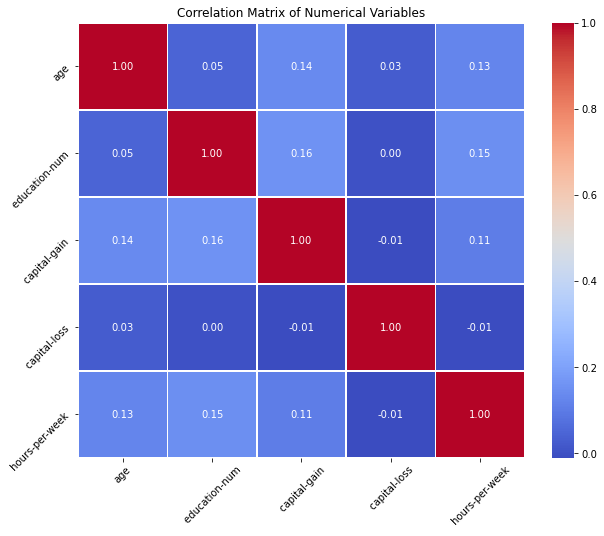

In [19]:
numerical_columns = ['age', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']
numerical_data = data[numerical_columns]

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Numerical Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

- 'education-num' and 'hours-per-week' have a high positive correlation among the off-diagonal pairs, though still quite weak, with a coefficient of 0.15.
- 'capital-gain' and 'education-num' show the highest positive correlation, with a coefficient of 0.16. Though this is also quite weak
- There is virtually no correlation between 'capital-loss' and 'capital-gain', as well as 'capital-loss' and 'hours-per-week', with coefficients near 0.
- Capital loss does not strongly correlate with any other variable, with all coefficients being 0.03 or lower.
- Age does have weak correlation between capital and gain and hours per weak though it is very small, 0.14 and 0.13.

### **Data Preparation for Modelling**

In [20]:

X = data.drop(' Income-category', axis=1)
y = data[' Income-category']

In [21]:
#  categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# label encoding categorical columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# scaling numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [22]:
mapping_dict = {' <=50K': 0, ' >50K': 1}
y = y.map(mapping_dict)

In [23]:
y.value_counts()

0    6493
1    1982
Name:  Income-category, dtype: int64

Create Training and Testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


**Evaluation Function**

In [25]:


def evaluate_model(model, X_train, y_train, X_test, y_test):

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training and Testing Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print("Training Accuracy:", train_accuracy)
    print('---'*50)
    print("\nTesting Accuracy:", test_accuracy)

    # Precision, Recall, F1 Score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='binary')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print('---'*50)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Confusion Matrix of {model.__class__.__name__}")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    # ROC Curve
    y_test_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve of {model.__class__.__name__}")
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()


## **(b) Basic Classifiers Evaluation**
- **Decision Tree (Depth ≤ 3):** Implement a decision tree with a maximum depth of 3. This constraint ensures simplicity and prevents overfitting.
- **Neural Network (≤ 10 Hidden Nodes):** Construct a neural network with no more than 10 hidden nodes. This keeps the model relatively simple.
- **1-NN (1-Nearest Neighbor):** Use a 1-NN classifier, which is a basic form of instance-based learning.
- **Evaluation:** Evaluate each model using metrics.

### **Decision Tree Classifier**

In [26]:
#  classifier with maximum depth of 3
dt_classifier = DecisionTreeClassifier(max_depth=3)
#fit model
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

Training Accuracy: 0.8405604719764012
------------------------------------------------------------------------------------------------------------------------------------------------------

Testing Accuracy: 0.8507374631268436
Precision: 0.8112449799196787
Recall: 0.4950980392156863
F1 Score: 0.6149162861491629
------------------------------------------------------------------------------------------------------------------------------------------------------


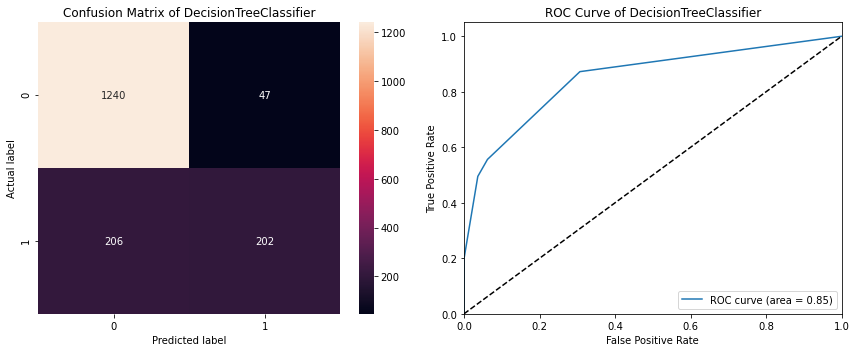

In [27]:
evaluate_model(dt_classifier, X_train, y_train, X_test, y_test)

### **Neural Network with 10 Hidden Nodes**

In [28]:

# Neural Network classifier with 10 hidden nodes
nn_classifier = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
nn_classifier.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

Training Accuracy: 0.8451327433628318
------------------------------------------------------------------------------------------------------------------------------------------------------

Testing Accuracy: 0.8542772861356932
Precision: 0.7588424437299035
Recall: 0.5784313725490197
F1 Score: 0.6564673157162726
------------------------------------------------------------------------------------------------------------------------------------------------------


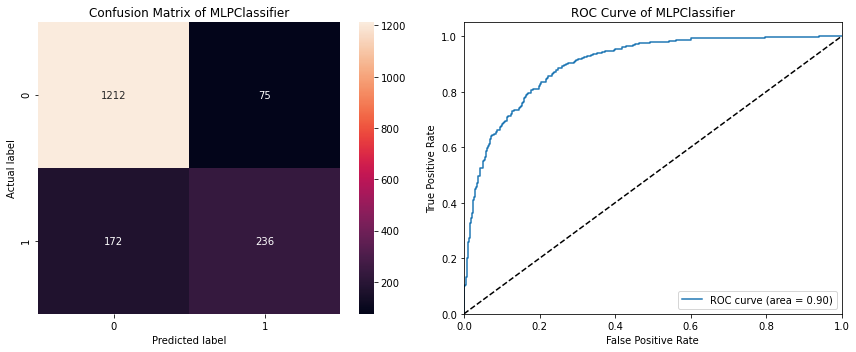

In [29]:
# Evaluate the Neural Network
evaluate_model(nn_classifier, X_train, y_train, X_test, y_test)

### **1-Nearest Neighbor Classifier**

In [30]:


# 1-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

Training Accuracy: 1.0
------------------------------------------------------------------------------------------------------------------------------------------------------

Testing Accuracy: 0.8035398230088495
Precision: 0.5939849624060151
Recall: 0.5808823529411765
F1 Score: 0.587360594795539
------------------------------------------------------------------------------------------------------------------------------------------------------


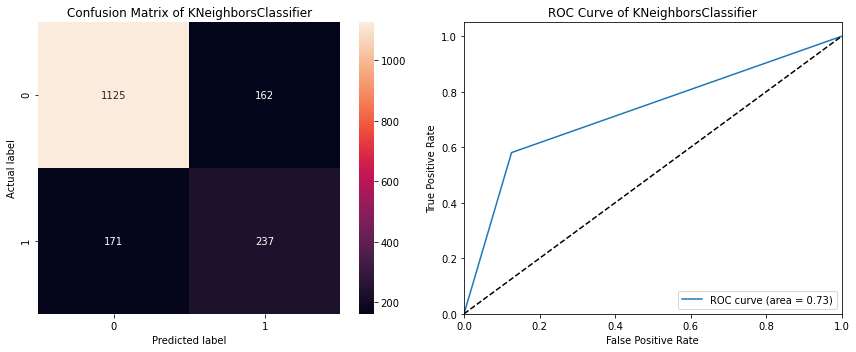

In [31]:
# Evaluate the 1-NN Classifier
evaluate_model(knn_classifier, X_train, y_train, X_test, y_test)

## **(c) Ensembles with Bagging**
- **Implement Bagging**: Apply bagging to each of the three classifiers. Start with an ensemble size of 2 and increase in steps of 2, up to 20 members.
- **Performance Evaluation:** At each ensemble size, evaluate performance based on accuracy. Record how performance changes with increasing ensemble size.
- **Optimal Ensemble Size:** Identify the best-performing ensemble size for each classifier.
- **Bootstrap Sample Size:** Experiment with different bootstrap sample sizes at the best ensemble size and observe how it affects performance.

#### **Create Bagging Ensembles and Evaluate Performance for Ensemble Sizes**

In [32]:
from sklearn.ensemble import BaggingClassifier

In [33]:
best_accuracy = 0
best_classifier = None
best_ensemble_size = 0

for base_classifier in [dt_classifier, nn_classifier, knn_classifier]:
    print(f"Evaluating {base_classifier.__class__.__name__}")
    for n_estimators in range(2, 21, 2):  # Ensemble sizes from 2 to 20
        bagging = BaggingClassifier(base_estimator=base_classifier, n_estimators=n_estimators, random_state=42)
        bagging.fit(X_train, y_train)
        y_test_pred = bagging.predict(X_test)
        accuracy = accuracy_score(y_test, y_test_pred)
        print(f"Ensemble Size {n_estimators}: Accuracy = {accuracy:.4f}")

        # Update best classifier and ensemble size
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_classifier = base_classifier.__class__.__name__
            best_ensemble_size = n_estimators

# Print the best ensemble size and classifier
print(f"\nBest Ensemble Size: {best_ensemble_size} with {best_classifier}, Achieving Accuracy: {best_accuracy:.4f}")

Evaluating DecisionTreeClassifier
Ensemble Size 2: Accuracy = 0.8549
Ensemble Size 4: Accuracy = 0.8549
Ensemble Size 6: Accuracy = 0.8507
Ensemble Size 8: Accuracy = 0.8507
Ensemble Size 10: Accuracy = 0.8566
Ensemble Size 12: Accuracy = 0.8566
Ensemble Size 14: Accuracy = 0.8566
Ensemble Size 16: Accuracy = 0.8566
Ensemble Size 18: Accuracy = 0.8566
Ensemble Size 20: Accuracy = 0.8566
Evaluating MLPClassifier
Ensemble Size 2: Accuracy = 0.8490
Ensemble Size 4: Accuracy = 0.8496
Ensemble Size 6: Accuracy = 0.8513
Ensemble Size 8: Accuracy = 0.8513
Ensemble Size 10: Accuracy = 0.8543
Ensemble Size 12: Accuracy = 0.8549
Ensemble Size 14: Accuracy = 0.8549
Ensemble Size 16: Accuracy = 0.8560
Ensemble Size 18: Accuracy = 0.8560
Ensemble Size 20: Accuracy = 0.8560
Evaluating KNeighborsClassifier
Ensemble Size 2: Accuracy = 0.8212
Ensemble Size 4: Accuracy = 0.8124
Ensemble Size 6: Accuracy = 0.8124
Ensemble Size 8: Accuracy = 0.8100
Ensemble Size 10: Accuracy = 0.8059
Ensemble Size 12: Acc

**Investigate Effect of Bootstrap Sample Size**

In [34]:
print(f"\nBest Ensemble Size: {best_ensemble_size} \nwith {best_classifier}, \nAchieving Accuracy: {best_accuracy:.4f}")


Best Ensemble Size: 10 
with DecisionTreeClassifier, 
Achieving Accuracy: 0.8566


In [35]:
# Different bootstrap sample sizes to test
bootstrap_sample_sizes = [0.1, 0.2, 0.5, 0.7, 1.0]  # as a fraction of the dataset size

print(f"Evaluating {nn_classifier.__class__.__name__} with Ensemble Size {best_ensemble_size}")

for sample_size in bootstrap_sample_sizes:
    bagging = BaggingClassifier(base_estimator=nn_classifier, 
                                n_estimators=best_ensemble_size, 
                                max_samples=sample_size, 
                                random_state=42)
    bagging.fit(X_train, y_train)
    y_test_pred = bagging.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Bootstrap Sample Size {sample_size}: Accuracy = {accuracy:.4f}")

Evaluating MLPClassifier with Ensemble Size 10
Bootstrap Sample Size 0.1: Accuracy = 0.8501
Bootstrap Sample Size 0.2: Accuracy = 0.8543
Bootstrap Sample Size 0.5: Accuracy = 0.8537
Bootstrap Sample Size 0.7: Accuracy = 0.8525
Bootstrap Sample Size 1.0: Accuracy = 0.8543


## **(d) Ensembles with Random Subspacing**
- **Implement Random Subspacing:** Apply random subspacing to each of the three classifiers. Increase the ensemble size in steps as before.
- **Performance Evaluation:** Evaluate how performance varies with ensemble size.
- **Optimal Ensemble Size:** Determine the best ensemble size for each classifier.
- **Feature Subset Size:** Experiment with different sizes of feature subsets in random subspacing and observe the impact on performance.

#### **Random Subspacing Ensembles and Evaluate Performance**

In [36]:

best_accuracy = 0
best_classifier = None
best_ensemble_size = 0
best_max_features = 0

max_features_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
results = {cls.__class__.__name__: {} for cls in [dt_classifier, nn_classifier, knn_classifier]}

for base_classifier in [dt_classifier, nn_classifier, knn_classifier]:
    classifier_name = base_classifier.__class__.__name__
    print(f"Evaluating {classifier_name}")
    
    for n_estimators in range(2, 21, 2):  # Ensemble sizes from 2 to 20
        for max_features in max_features_values:
            bagging = BaggingClassifier(base_estimator=base_classifier, 
                                        n_estimators=n_estimators, 
                                        max_features=max_features, 
                                        random_state=42, 
                                        bootstrap=False, 
                                        bootstrap_features=True)
            bagging.fit(X_train, y_train)
            y_test_pred = bagging.predict(X_test)
            accuracy = accuracy_score(y_test, y_test_pred)

            # Store results
            results[classifier_name].setdefault(n_estimators, []).append(accuracy)

            # Update best classifier, ensemble size, and max features
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_classifier = classifier_name
                best_ensemble_size = n_estimators
                best_max_features = max_features

Evaluating DecisionTreeClassifier
Evaluating MLPClassifier
Evaluating KNeighborsClassifier


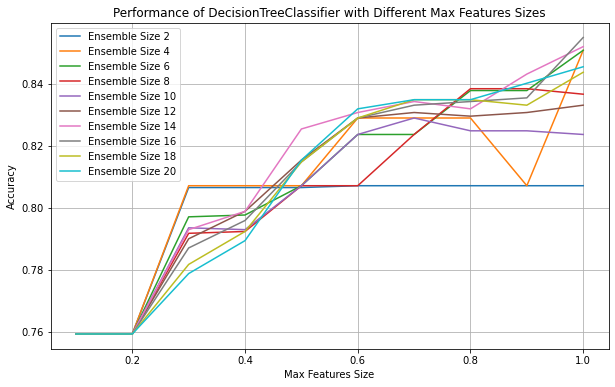

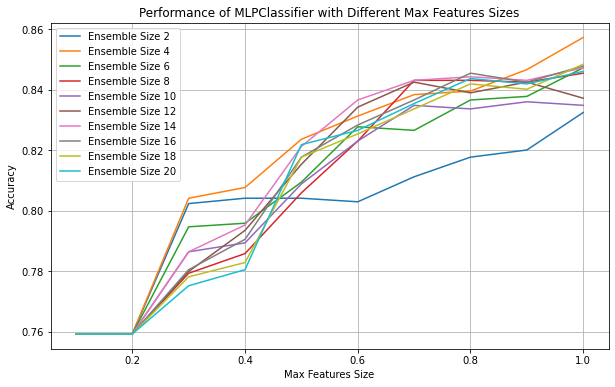

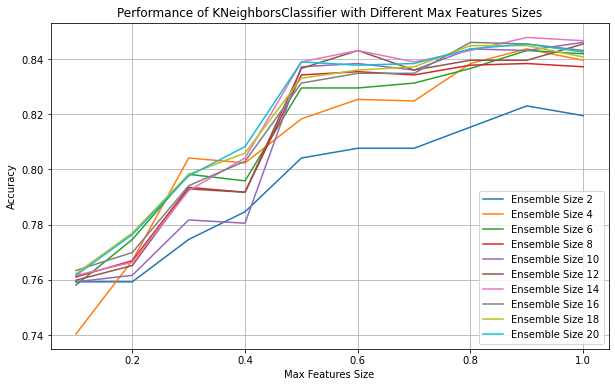

In [37]:
# plotting the results
for classifier_name, data in results.items():
    plt.figure(figsize=(10, 6))
    for ensemble_size, accuracies in data.items():
        plt.plot(max_features_values, accuracies, label=f'Ensemble Size {ensemble_size}')
    plt.title(f'Performance of {classifier_name} with Different Max Features Sizes')
    plt.xlabel('Max Features Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [38]:
# Print the best ensemble size, max features, and classifier
print(f"\nBest Ensemble Size: {best_ensemble_size}, \nBest Max Features: {best_max_features} \nwith {best_classifier}, \nAchieving Accuracy: {best_accuracy:.4f}")


Best Ensemble Size: 4, 
Best Max Features: 1.0 
with MLPClassifier, 
Achieving Accuracy: 0.8572


best_ensemble_size is known from previous analysis

Evaluating DecisionTreeClassifier
Evaluating MLPClassifier
Evaluating KNeighborsClassifier


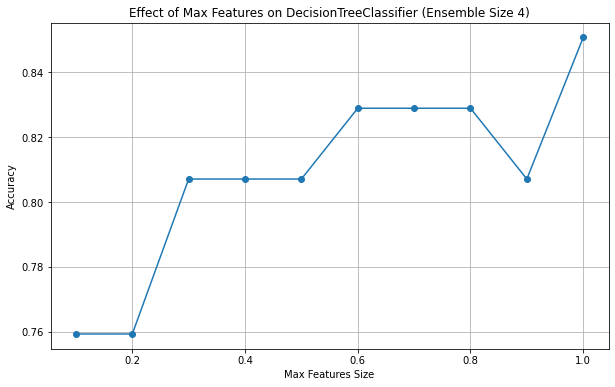

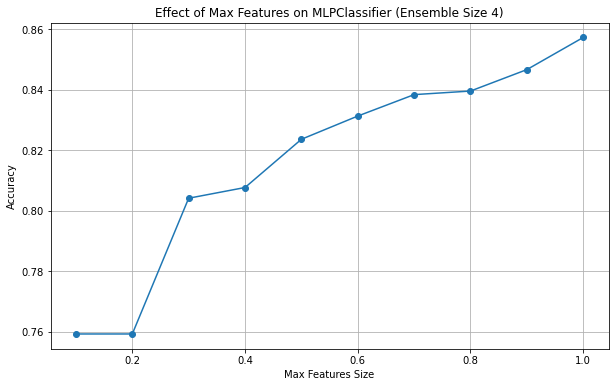

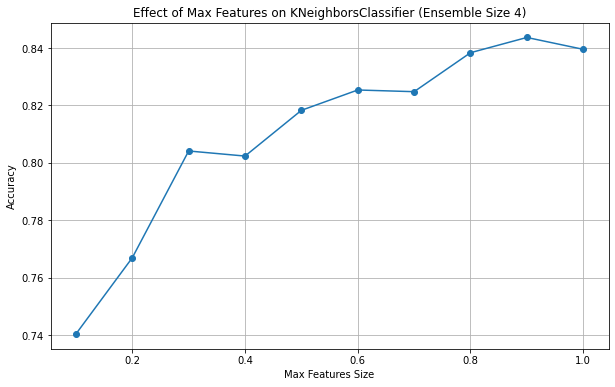

In [39]:
# best_ensemble_size is known from previous analysis
best_ensemble_size = 4

max_features_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
feature_results = {cls.__class__.__name__: [] for cls in [dt_classifier, nn_classifier, knn_classifier]}

for base_classifier in [dt_classifier, nn_classifier, knn_classifier]:
    classifier_name = base_classifier.__class__.__name__
    print(f"Evaluating {classifier_name}")

    for max_features in max_features_values:
        bagging = BaggingClassifier(base_estimator=base_classifier, 
                                    n_estimators=best_ensemble_size, 
                                    max_features=max_features, 
                                    random_state=42, 
                                    bootstrap=False, 
                                    bootstrap_features=True)
        bagging.fit(X_train, y_train)
        y_test_pred = bagging.predict(X_test)
        accuracy = accuracy_score(y_test, y_test_pred)
        feature_results[classifier_name].append(accuracy)

# Plotting the results for different max_features
for classifier_name, accuracies in feature_results.items():
    plt.figure(figsize=(10, 6))
    plt.plot(max_features_values, accuracies, marker='o')
    plt.title(f'Effect of Max Features on {classifier_name} (Ensemble Size {best_ensemble_size})')
    plt.xlabel('Max Features Size')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()


### **(e) Analysis and Conclusion**

### **Theory Behind Bagging and Random Subspacing**

#### **Bagging (Bootstrap Aggregating):**
Bagging is particularly effective for classifiers that have high variance. Decision trees, especially deep ones, are a classic example of high-variance classifiers. Bagging works by reducing variance without increasing bias, which makes it suitable for models like decision trees that are prone to overfitting.
For classifiers that are less prone to variance (e.g., simpler models or those that already incorporate some form of regularization), the benefits of bagging might be less pronounced.

#### **Random Subspacing:**
Random subspacing is more effective for classifiers that can benefit from a diverse set of features and where feature selection can play a crucial role in improving performance.
Classifiers like neural networks or K-Nearest Neighbors (KNN), which can be sensitive to the feature space, might benefit more from random subspacing as it introduces diversity in the feature space used by individual models in the ensemble.

### **Evaluation of Results**

#### **Decision Tree Classifier:**

The Decision Tree classifier showed consistent performance with increasing ensemble size in bagging, which aligns with the theoretical expectation. Decision Trees typically benefit from bagging due to their high variance nature.The decision tree classifier had the best performance at ensemble 10 achieving accuracy: 0.8566, which was the best result acheived by any method.

#### **MLP Classifier (Neural Network):**

The MLP Classifier showed improved performance with bagging, peaking at an ensemble size of 16. However, it achieved even better accuracy with random subspacing (accuracy of 0.8572 with ensemble size 4 and max features 1.0). This suggests that for this dataset, the MLP Classifier benefits from both strategies but slightly more from random subspacing. This might be somewhat unexpected as neural networks often benefit from a diverse set of training data (bagging) but can also leverage feature diversity (random subspacing).

#### **K-Nearest Neighbors (KNN):**
The performance of KNN actually decreased with increasing ensemble size in bagging, Peaking at Ensemble Size 4 with an accuracy of 0.8124. This might indicate that KNN does not benefit as much from bagging, possibly because it's a low-variance classifier. Information about its performance with random subspacing would be helpful for a more comprehensive comparison.


**Diversity in the Ensemble and Improvements**
- Diversity:
  - Ensuring diversity in the ensemble is crucial for its effectiveness. Diversity can come from using different types of models, different subsets of data (as in bagging), or different subsets of features (as in random subspacing). This ensemble appears to have some diversity, especially with the inclusion of random subspacing.
  
- Improvements:
To further improve the performance of ensemble, we could consider:
  - Incorporating additional types of base classifiers to introduce more diversity.
  - Experimenting with different parameters for both bagging and random subspacing to fine-tune the balance between bias and variance.
  - Exploring other ensemble techniques like boosting or stacking, which can further leverage the strengths of different classifiers.


### **Conclusion**
The results align well with theoretical expectations for the Decision Tree and KNN classifiers. For the MLP Classifier, the results suggest that it can benefit from both bagging and random subspacing, with a slight edge for random subspacing in this particular case. 

# **Machine Learning Question 2**

NOTE - 
I completed the second question using Google collab instead of Jupyter Notebook, The reason behind this was that I needed to use Google Collabs GPU in order to compare RL strategies using episodes. This code will run on google collab using its GPU taking 2-3 hours but may take much longer if run on jupyter notebook.

## **(a) Features for State Representation, Reward Function, and Episode Length**

**State Representation:**

- The Current Turn: Indicates which ball is being considered, represented as the first element in the state array.
- Bin Distribution: A list of length 10 representing the number of balls in each bin, making up the rest of the state array.

**Reward Function:**

- Clustering Penalty: A negative reward for each bin with more than one ball. This discourages the agent from clustering multiple balls in the same bin.
- Spreading Reward: A positive reward for each bin that contains exactly one ball. This encourages the distribution of balls across bins.
- Terminal Reward: At the end of an episode, a larger reward is given based on the number of bins that contain exactly one ball.

**Length of an Episode:**
- The length of an episode is determined by the number of balls (num_balls). Once all balls have been considered (i.e., turn equals num_balls), the episode ends.


## **b) Interaction with the Environment**
The interaction is defined through several key functions:

- __init__: Initializes the environment, setting up the action and observation spaces, and the initial state.
- _reset_bins: Resets the bins to the initial state (all balls in bin 5).
- step: Processes an action from the agent (keep, move left, move right), updates the state, calculates the reward, and checks if the episode is done.
- reset: Resets the environment to start a new episode.
- render: A utility function for visualizing the current state of the environment.
- _get_state: Returns the current state of the environment.
- _calculate_reward and _calculate_terminal_reward: Calculate the reward based on the current state of the bins.

In [1]:
import numpy as np
import gym
from gym import spaces

import warnings
warnings.filterwarnings('ignore')


Custome RL Environment

In [2]:
class BallBinsEnvironment(gym.Env):
    def __init__(self):
        super(BallBinsEnvironment, self).__init__()
        self.num_balls = 10
        self.num_bins = 10
        self.action_space = spaces.Discrete(3)  # Actions: 0 - keep, 1 - move left, 2 - move right

        # Define observation space as a Box space
        self.observation_space = spaces.Box(low=0, high=self.num_balls,
                                            shape=(self.num_bins + 1,), dtype=np.int32)

        self.bins = np.zeros(self.num_bins, dtype=int)
        self.current_ball_bin = 5  # Initially, all balls are in bin 5
        self.turn = 0
        self._reset_bins()

    def _reset_bins(self):
        self.bins = np.zeros(self.num_bins, dtype=int)
        self.bins[5] = self.num_balls
        self.current_ball_bin = 5
        self.turn = 0

    def step(self, action):
        reward = 0
        done = False

        # Action logic
        if action == 1 and self.current_ball_bin > 0:  # Move left
            self.bins[self.current_ball_bin] -= 1
            self.current_ball_bin -= 1
            self.bins[self.current_ball_bin] += 1
        elif action == 2 and self.current_ball_bin < self.num_bins - 1:  # Move right
            self.bins[self.current_ball_bin] -= 1
            self.current_ball_bin += 1
            self.bins[self.current_ball_bin] += 1

        reward = self._calculate_reward()

        # Update turn and check if episode is done
        self.turn += 1
        if self.turn >= self.num_balls:
            done = True
            reward += self._calculate_terminal_reward()

        return self._get_state(), reward, done, {}

    def reset(self):
        self._reset_bins()
        return self._get_state()

    def render(self, mode='human'):
        print(f"Bins: {self.bins}, Current Ball Bin: {self.current_ball_bin}, Turn: {self.turn}")

    def _get_state(self):
        # flatten the state into a 1D array
        state = np.concatenate(([self.turn], self.bins))
        return state

    def _calculate_reward(self):
        # negative reward for clustering
        clustering_penalty = sum(-1 for count in self.bins if count > 1)
        # positive reward for spreading balls
        spreading_reward = sum(1 for count in self.bins if count == 1)
        return clustering_penalty + spreading_reward

    def _calculate_terminal_reward(self):
        # larger reward if each bin ends up with exactly one ball
        return 10 * sum(1 for count in self.bins if count == 1)


In [3]:
!pip install stable-baselines3[extra] gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 10.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.5 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=3eb3a03a27dd1437f0176eb4994b12c3c227708f6b2f0f1beab12124ee1621f3
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [4]:
#  Create the environment
from stable_baselines3.common.env_util import make_vec_env
env = make_vec_env(lambda: BallBinsEnvironment(), n_envs=1)

## **(c) Comparing RL Strategies**
For comparing PPO, DQN, and A2C strategies, a framework like Stable Baselines3 is required.

However, implementing the training and comparison of these strategies involves substantial computational resources, which is why I completed this question using Google collab.

In [5]:
from stable_baselines3 import DQN, PPO, A2C

**Training with 50000 Timesteps**

- **DQN**

In [6]:
# Initialize the agent
dqn = DQN("MlpPolicy", env, verbose=1)
# Train the agent
dqn.learn(total_timesteps=50000)

Streaming output truncated to the last 5000 lines.
| time/               |          |
|    episodes         | 3184     |
|    fps              | 2274     |
|    time_elapsed     | 14       |
|    total_timesteps  | 31840    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 6.66     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3188     |
|    fps              | 2272     |
|    time_elapsed     | 14       |
|    total_timesteps  | 31880    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 6.79     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3192     |
|    fps              | 2273     |
|    time_elapsed     | 14       |
|    total_timesteps  | 31920    |
----

- **Train the PPO agent 50000 timesteps:**

In [7]:
ppo_model = PPO("MlpPolicy", env, verbose=1)
ppo_model.learn(total_timesteps=50000)

Using cuda device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10       |
|    ep_rew_mean     | 6.09     |
| time/              |          |
|    fps             | 344      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 10          |
|    ep_rew_mean          | 8.16        |
| time/                   |             |
|    fps                  | 409         |
|    iterations           | 2           |
|    time_elapsed         | 10          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013938438 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0.0152     |
|    learnin

- **Train the A2C agent with 50000 timesteps**

In [8]:
a2c_model = A2C("MlpPolicy", env, verbose=1)
a2c_model.learn(total_timesteps=50000)

Using cuda device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 10       |
|    ep_rew_mean        | 9.78     |
| time/                 |          |
|    fps                | 476      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.146   |
|    explained_variance | 0.978    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.84e-05 |
|    value_loss         | 0.000388 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 10       |
|    ep_rew_mean        | 9.88     |
| time/                 |          |
|    fps                | 472      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/            

**Evaluate the Model**

In [9]:
def evaluate_agent(agent, num_episodes):
    total_rewards = []
    for _ in range(num_episodes):
        obs = env.reset()
        done = False
        episode_reward = 0
        while not done:
            action, _ = agent.predict(obs)
            obs, reward, done, _ = env.step(action)
            episode_reward += reward
        total_rewards.append(episode_reward)
    avg_reward = sum(total_rewards) / num_episodes
    return avg_reward


In [10]:
# It took roughly 3 hours to run this code. 
num_episodes_list = [50000, 100000, 200000]

for num_episodes in num_episodes_list:
    print(f"Evaluating after {num_episodes} episodes")
    print("DQN Average Reward:", evaluate_agent(dqn, num_episodes))
    print("PPO Average Reward:", evaluate_agent(ppo_model, num_episodes))
    print("A2C Average Reward:", evaluate_agent(a2c_model, num_episodes))
    print("=" * 50)

Evaluating after 50000 episodes
DQN Average Reward: [9.94594]
PPO Average Reward: [9.99994]
A2C Average Reward: [9.99996]
Evaluating after 100000 episodes
DQN Average Reward: [9.94781]
PPO Average Reward: [9.99976]
A2C Average Reward: [9.99996]
Evaluating after 200000 episodes
DQN Average Reward: [9.947295]
PPO Average Reward: [9.99973]
A2C Average Reward: [9.99994]


**1. Performance After 50,000 Episodes:**
- DQN: The average reward is 9.94594, a comparitively poor performance to other algorithms, indicating that it finds this task more difficult then PPO and A2C..
- PPO: Performs exceptionally well with an average reward close to the maximum (9.99994).
- A2C: Shows the best performance among the three, with an average reward that is nearly perfect (9.99996).

**2. Performance After 100,000 Episodes:**
- DQN: Continues to perform comparitively poorly with the lowest average reward (9.94781).
- PPO: Maintains high performance, similar to the 50,000-episode mark (9.99976)
- A2C: Again, demonstrates the best performance with an almost perfect score (9.99996)

**3. Performance After 200,000 Episodes:**
- DQN: Continues to perform poorly with the lowest average reward (9.947295).
- PPO: Maintains high performance, similar to the 100,000-episode mark (9.99973).
- A2C: Again, demonstrates the best performance with an almost perfect score (9.99994).

- **DQN's Struggle:** The lower scores for DQN suggest it finds this task more challenging then the other RL strategies. This might be due to its limitation in handling environments where the state space is relatively complex, it could also mean the reward structure is challenging to navigate with value-based methods.
- **PPO and A2C's Success:** Both algorithms have shown remarkable success, but A2C performs slightly better then PPO. This could be due to A2C's efficient handling of on-policy learning and potentially, its better exploitation of the environment's dynamics in this specific scenario.
- **Learning Speed:** While both PPO and A2C reach high performance quickly, A2C appears to learn the strategy slightly quicker and more effectively, as evidenced by its marginally higher rewards at 50,000, 100,000 and 200,000 episodes.

**Why A2C Might Be Performing Best:**

A2C's advantage could stem from its ability to more effectively balance exploration and exploitation, as well as from its on-policy approach, which appears to be better suited to the task's specifics, such as the need for fine-grained decisions and adaptation to the evolving state of the bins and balls.

## **(d) Neural Network Architecture Optimization**

Start with a network of 3 hidden layers with 64 neurons each and gradually reduce the size. Test with various configurations (like fewer layers, fewer neurons) to find the minimal architecture that still learns effectively.

In [11]:
from stable_baselines3 import A2C
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
import torch.nn as nn
import torch

In [12]:
class CustomNN(BaseFeaturesExtractor):
    def __init__(self, observation_space, features_dim=64):
        super(CustomNN, self).__init__(observation_space, features_dim)

        # Define a simple 3-layer architecture
        self.network = nn.Sequential(
            nn.Linear(observation_space.shape[0], 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, features_dim)
        )

    def forward(self, observations):
        return self.network(observations)

policy_kwargs = dict(
    features_extractor_class=CustomNN,
    features_extractor_kwargs=dict(features_dim=64),
)


In [13]:
a2c_model_nn = A2C("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=1)
a2c_model_nn.learn(total_timesteps=50000) #train agent

Using cuda device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 10       |
|    ep_rew_mean        | 9.4      |
| time/                 |          |
|    fps                | 327      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.285   |
|    explained_variance | 0.946    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.0058  |
|    value_loss         | 0.00822  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 10       |
|    ep_rew_mean        | 9.63     |
| time/                 |          |
|    fps                | 367      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/            

In [14]:
num_episodes = 50 # Number of episodes for evaluation
average_reward_nn = evaluate_agent(a2c_model_nn, num_episodes)
print(f"Average Reward with NN Architecture: {average_reward_nn}")

Average Reward with NN Architecture: [10.]


Gradual Reduction and Testing Minimal Configurations

In [15]:
class CustomNNMinimal(BaseFeaturesExtractor):
    def __init__(self, observation_space, features_dim=2):
        super(CustomNNMinimal, self).__init__(observation_space, features_dim)

        # Single hidden layer with 2 neurons
        self.network = nn.Sequential(
            nn.Linear(observation_space.shape[0], 2),
            nn.ReLU(),
            nn.Linear(2, features_dim)
        )

    def forward(self, observations):
        return self.network(observations)

policy_kwargs_minimal = dict(
    features_extractor_class=CustomNNMinimal,
    features_extractor_kwargs=dict(features_dim=2),
)

In [16]:
a2c_model_minimal = A2C("MlpPolicy", env, policy_kwargs=policy_kwargs_minimal, verbose=1)
a2c_model_minimal.learn(total_timesteps=50000, progress_bar = True)


 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 49,945/50,000  [ 0:02:18 < 0:00:01 , 356 it/s ]

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 10       |
|    ep_rew_mean        | 10       |
| time/                 |          |
|    fps                | 359      |
|    iterations         | 10000    |
|    time_elapsed       | 138      |
|    total_timesteps    | 50000    |
| train/                |          |
|    entropy_loss       | -0.00112 |
|    explained_variance | 0.997    |
|    learning_rate      | 0.0007   |
|    n_updates          | 9999     |
|    policy_loss        | 4.74e-07 |
|    value_loss         | 6.22e-05 |
------------------------------------


In [17]:
num_episodes = 50000 # Number of episodes for evaluation
average_reward_minimal = evaluate_agent(a2c_model_minimal, num_episodes)
print(f"Average Reward with NN Architecture: {average_reward_nn}")

Average Reward with NN Architecture: [10.]


The results indicate that both neural network architectures—one with a single hidden layer of 2 neurons and the other with 3 hidden layers of 64 neurons each—achieved the same average reward of 10.

The fact that a minimal architecture with just a single hidden layer of 2 neurons could perform as well as a more complex one suggests that the task at hand might not require a high level of computational complexity. For many RL problems, especially those with a relatively straightforward decision space or a limited number of inputs, simpler neural network architectures can be quite effective.

The suitability of a neural network's architecture is highly dependent on the specifics of the task.